<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

#### 2. Connect to the Database


**Install the needed libraries**


In [15]:
!pip install pandas

In [16]:
!pip install matplotlib

In [17]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
# conn = sqlite3.connect('survey-results-public.sqlite')  le fichier survey-resuslts-public est vide
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


#### Demo 2: List All Tables


In [10]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)

,Table_Name
0,main


In [11]:
QUERY = """ SELECT * FROM main LIMIT 5"""
pd.read_sql_query(QUERY, conn)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,None,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,None,None,None,None
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,None,None
3,4,I am learning to code,18-24 years old,"Student, full-time",None,Apples,None,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,None,None
4,5,I am a developer by profession,18-24 years old,"Student, full-time",None,Apples,None,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,None,None


#### Demo 3: Group Data by Age


In [12]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)

                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


In [22]:
QUERY = """ SELECT CompTotal,ResponseId FROM main WHERE Comptotal IS NOT NULL LIMIT 5"""
pd.read_sql_query(QUERY,conn)

,CompTotal,ResponseId
0,2040000.0,73
1,28000.0,375
2,85000.0,380
3,50000.0,386
4,110000.0,390


In [28]:
QUERY = """ SELECT CompTotal,ResponseId FROM main WHERE Comptotal IS NOT NULL"""
df_comptotal = pd.read_sql_query(QUERY,conn)

In [29]:
(df_comptotal['CompTotal'].isnull().sum())

np.int64(0)

In [31]:
df_comptotal['CompTotal'].value_counts()

CompTotal
100000.0    939
60000.0     839
120000.0    793
80000.0     728
50000.0     705
           ... 
201600.0      1
1100.0        1
133600.0      1
301210.0      1
81920.0       1
Name: count, Length: 3337, dtype: int64

In [34]:
df_comptotal['CompTotal'].describe()

count     3.374000e+04
mean     2.963841e+145
std      5.444117e+147
min       0.000000e+00
25%       6.000000e+04
50%       1.100000e+05
75%       2.500000e+05
max      1.000000e+150
Name: CompTotal, dtype: float64

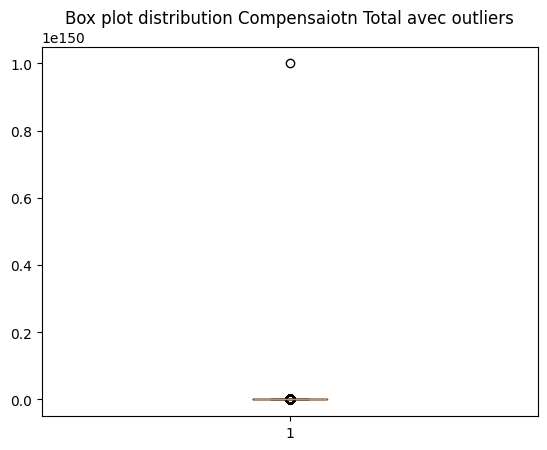

In [37]:
plt.boxplot(df_comptotal['CompTotal'])
plt.title('Box plot distribution Compensaiotn Total avec outliers')
plt.show()

In [39]:
Q3 = df_comptotal['CompTotal'].quantile(0.75) 
Q1 = df_comptotal['CompTotal'].quantile(0.25)
IQR = Q3-Q1 
higher_outlier = Q3 + 1.5*IQR 
df_comptotal_filtered = df_comptotal[df_comptotal['CompTotal']<higher_outlier] 

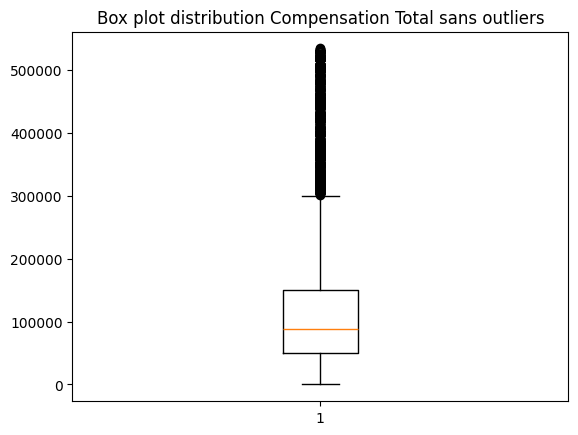

In [40]:
plt.boxplot(df_comptotal_filtered['CompTotal'])
plt.title('Box plot distribution Compensation Total sans outliers')
plt.show()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


In [18]:
QUERY = """ SELECT Age, ResponseId FROM main """
df_age = pd.read_sql_query(QUERY, conn)

In [5]:
df_age['Age'].unique()

array(['Under 18 years old', '35-44 years old', '45-54 years old',
       '18-24 years old', '25-34 years old', '55-64 years old',
       'Prefer not to say', '65 years or older'], dtype=object)

In [6]:
df_age.columns

Index(['Age', 'ResponseId'], dtype='object')

In [19]:
#convertir Age en variable quantitative en attribuant la valeur moyenne de chaque classe a la calsse
import numpy as np
def age_quantitative (age):
    if age =='Prefer not to say':
        return np.nan
    if age =='Under 18 years old' :
        return 17
    elif age =='35-44 years old':
        return (35+44)/2
    elif age =='45-54 years old':
        return (45+54)/2
    elif age =='18-24 years old':
        return (18+24)/2 
    elif age =='25-34 years old': 
        return (25+34)/2
    elif age =='55-64 years old': 
        return (55+64)/2 
    elif age =='65 years or older':  
        return 66

#a verifier, il faut une df avec une colonne Age cat et Age quantitative
df_age['Age'] = df_age['Age'].apply(age_quantitative)

In [20]:
(df_age['Age'].isnull().sum())

np.int64(322)

In [10]:
df_age['Age'].describe()

count    65115.000000
mean        32.999885
std         11.057946
min         17.000000
25%         21.000000
50%         29.500000
75%         39.500000
max         66.000000
Name: Age, dtype: float64

In [11]:
if isinstance(df_age, pd.DataFrame):
    print("L'objet est un DataFrame.")
else:
    print("L'objet n'est pas un DataFrame.")

L'objet est un DataFrame.


In [21]:
df_filtered = df_age.dropna()

In [22]:
print(df_filtered.isnull().sum())

Age           0
ResponseId    0
dtype: int64


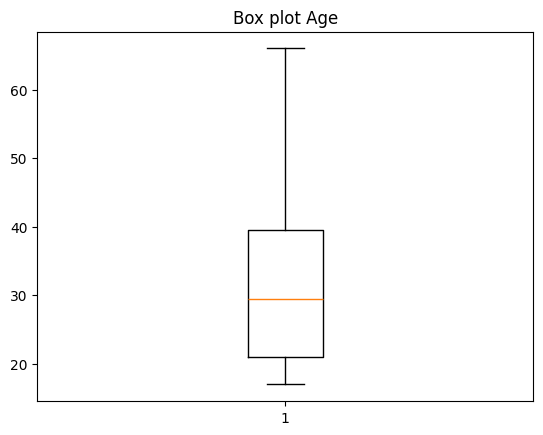

In [26]:
plt.boxplot(df_filtered['Age']) 
plt.title('Box plot Age')
plt.show()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


In [44]:
#selectionner les 3 varibles, filter sur CompTotal pour enlever les NaN et les outliers
QUERY = """ SELECT Age, CompTotal, ResponseId FROM main WHERE CompTotal <535000 AND CompTotal IS NOT NULL""" 
df_comp_age =pd.read_sql_query(QUERY,conn)

In [36]:
!pip install seaborn

In [37]:
import seaborn as sns

In [48]:
# Groupement et comptage
grouped = df_comp_age.groupby(['Age', 'CompTotal']).size().reset_index(name='Count')

In [53]:
print(grouped['Age'].unique())

['18-24 years old' '25-34 years old' '35-44 years old' '45-54 years old'
 '55-64 years old' '65 years or older' 'Prefer not to say'
 'Under 18 years old']


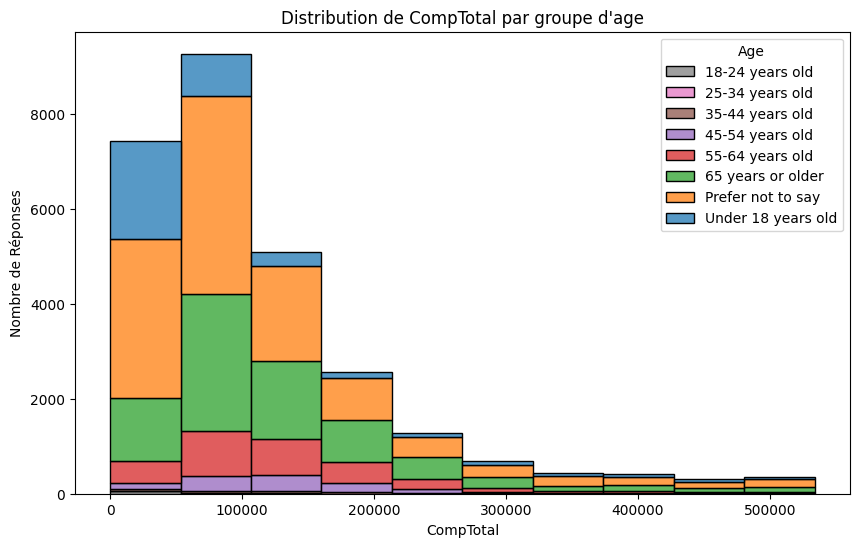

In [54]:
# Tracé des distributions
plt.figure(figsize=(10, 6))
sns.histplot(data=grouped, x='CompTotal', hue='Age', weights='Count', multiple='stack', bins=10, kde=False)

# Ajustements des labels et du titre
plt.title('Distribution de CompTotal par groupe d\'age')
plt.xlabel('CompTotal')
plt.ylabel('Nombre de Réponses')
plt.legend(title='Age', labels=grouped['Age'].unique())
plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


In [57]:
QUERY = """ SELECT JobSatPoints_6, CompTotal FROM main 
WHERE CompTotal <535000 AND CompTotal IS NOT NULL AND JobSatPoints_6 IS NOT NULL""" 
df_jobsat_comp = pd.read_sql_query(QUERY,conn)

In [59]:
(df_jobsat_comp.shape)

(18422, 2)

/tmp/ipykernel_301/3049232689.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='JobSatPoints_6', y='CompTotal', data=df_jobsat_comp, palette='viridis')


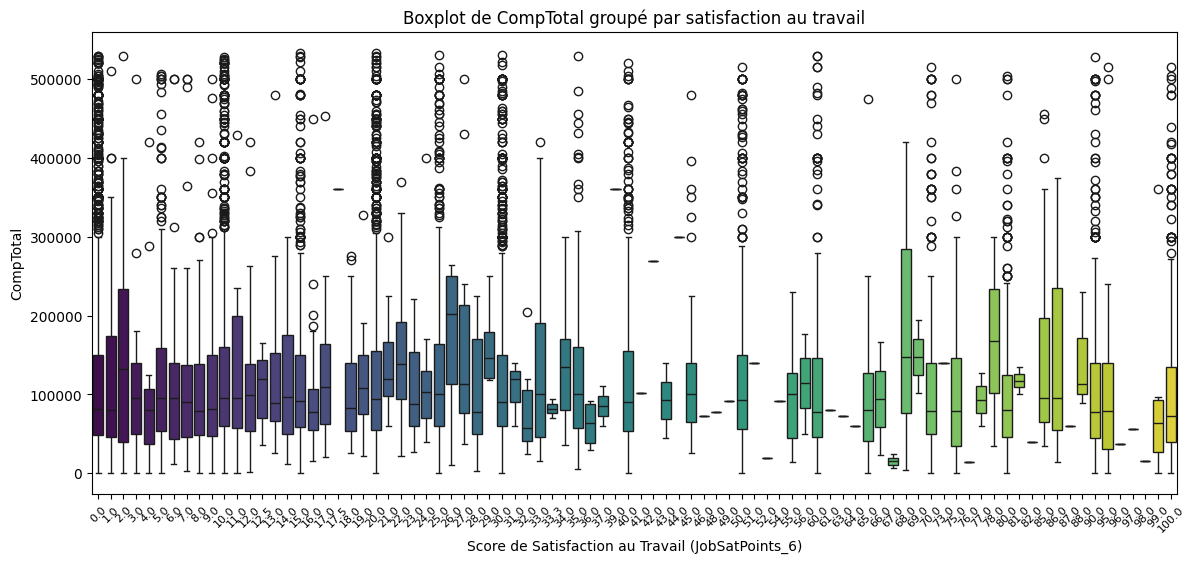

In [65]:
# Création du boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(x='JobSatPoints_6', y='CompTotal', data=df_jobsat_comp, palette='viridis')

# Ajustements des labels et du titre
plt.title('Boxplot de CompTotal groupé par satisfaction au travail')
plt.xlabel('Score de Satisfaction au Travail (JobSatPoints_6)')
plt.xticks(fontsize=8, rotation=45)
plt.ylabel('CompTotal')
plt.show()

/tmp/ipykernel_301/3181943880.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='JobSatCategory', y='CompTotal', data=df_jobsat_comp, palette='coolwarm')


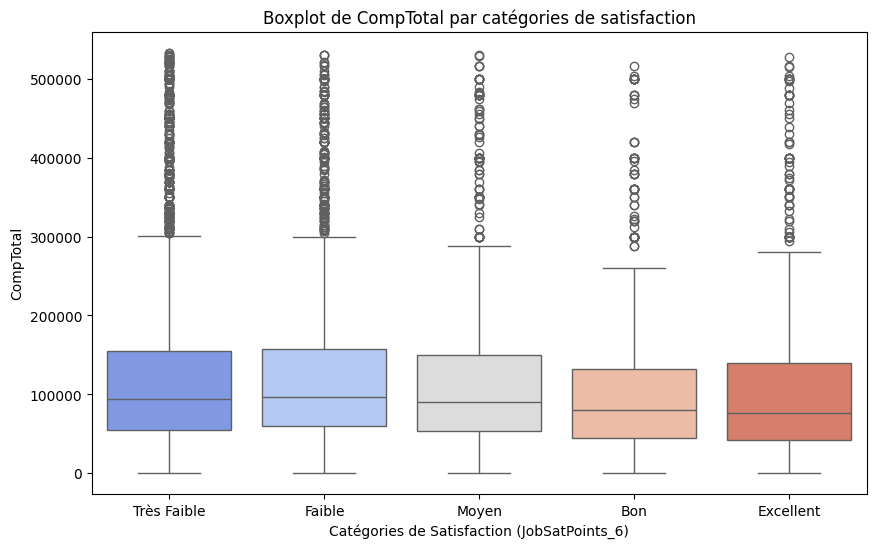

In [68]:
# Ajout d'une colonne de catégorie basée sur des intervalles
df_jobsat_comp['JobSatCategory'] = pd.cut(df_jobsat_comp['JobSatPoints_6'], 
                              bins=[0, 20, 40, 60, 80, 100],
                              labels=['Très Faible', 'Faible', 'Moyen', 'Bon', 'Excellent'])

# Création du boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='JobSatCategory', y='CompTotal', data=df_jobsat_comp, palette='coolwarm')

# Ajustements des labels et du titre
plt.title('Boxplot de CompTotal par catégories de satisfaction')
plt.xlabel('Catégories de Satisfaction (JobSatPoints_6)')
plt.ylabel('CompTotal')
plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.
Il n'y a pas de vraiable Developer roles, mais MainBranch contient 5 categories, alors je vais utiliser MainBranch !



In [92]:
QUERY = """ SELECT MainBranch, CompTotal, ResponseId FROM main WHERE CompTotal <535000 
AND CompTotal IS NOT NULL"""

df_mainbranch=pd.read_sql_query(QUERY,conn)

In [93]:
df_mainbranch = df_mainbranch.groupby(['MainBranch', 'CompTotal']).size().reset_index(name='Count')

In [94]:
df_mainbranch.head()

,MainBranch,CompTotal,Count
0,I am a developer by profession,0.0,106
1,I am a developer by profession,1.0,9
2,I am a developer by profession,2.0,2
3,I am a developer by profession,3.0,1
4,I am a developer by profession,4.0,4


In [95]:
(df_mainbranch.isnull().sum())

MainBranch    0
CompTotal     0
Count         0
dtype: int64

In [96]:
df_mainbranch.shape

(2540, 3)

In [97]:
df_mainbranch['MainBranch'].unique()

array(['I am a developer by profession',
       'I am not primarily a developer, but I write code sometimes as part of my work/studies'],
      dtype=object)

/tmp/ipykernel_301/2085490748.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='MainBranch', y='CompTotal', data=df_mainbranch, palette='coolwarm')


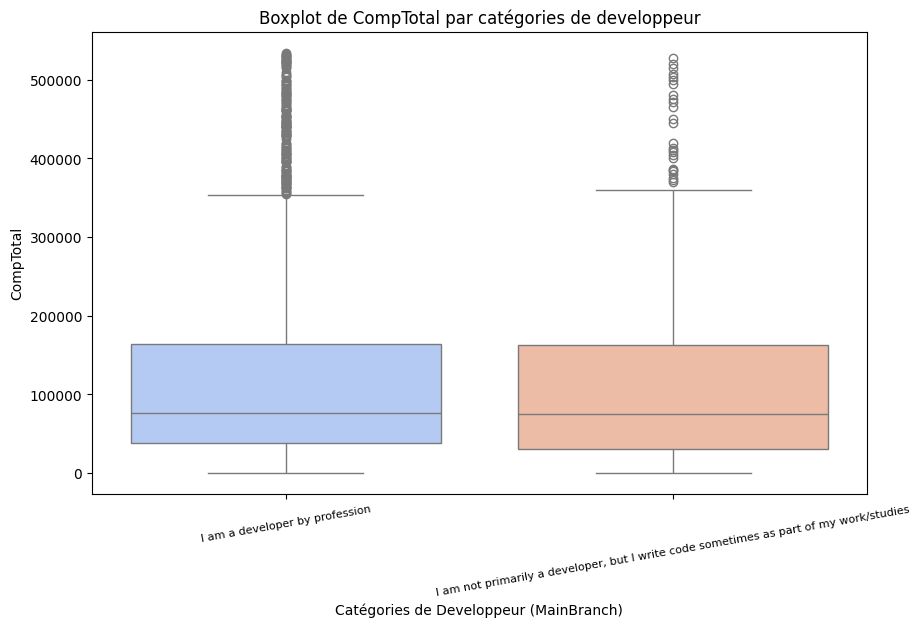

In [101]:
# Création du boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='MainBranch', y='CompTotal', data=df_mainbranch, palette='coolwarm')

# Ajustements des labels et du titre
plt.title('Boxplot de CompTotal par catégories de developpeur')
plt.xlabel('Catégories de Developpeur (MainBranch)')
plt.xticks(fontsize=8, rotation=10)
plt.ylabel('CompTotal')
plt.show()

In [102]:
QUERY = """ SELECT MainBranch, CompTotal, ResponseId FROM main """
df_mainbranch_1=pd.read_sql_query(QUERY,conn)

In [111]:
df_mainbranch_1.shape

(3803, 3)

In [103]:
df_mainbranch_1['MainBranch'].unique()

array(['I am a developer by profession', 'I am learning to code',
       'I code primarily as a hobby',
       'I am not primarily a developer, but I write code sometimes as part of my work/studies',
       'I used to be a developer by profession, but no longer am'],
      dtype=object)

In [107]:
print(df_mainbranch_1['MainBranch'].value_counts())

MainBranch
I am a developer by profession                                                           3188
I am not primarily a developer, but I write code sometimes as part of my work/studies     615
Name: count, dtype: int64


In [108]:
print(df_mainbranch_1['MainBranch'].isnull().sum())

0


In [110]:
print(df_mainbranch_1.groupby('MainBranch').size())

MainBranch
I am a developer by profession                                                           3188
I am not primarily a developer, but I write code sometimes as part of my work/studies     615
dtype: int64


In [104]:
df_mainbranch_1 = df_mainbranch_1.groupby(['MainBranch', 'CompTotal']).size().reset_index(name='Count')

In [105]:
df_mainbranch_1['MainBranch'].unique()

array(['I am a developer by profession',
       'I am not primarily a developer, but I write code sometimes as part of my work/studies'],
      dtype=object)

💡Il y a 5 categories de MainBranch, mais seulement 2 ont des data. Comme ResponseId est extrait, c'est l'identifiant unique du dataset, il n'y a donc bien que 2 categories de rponses pour MainBranch.

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.
Top 5 countries by number of respondants


In [127]:
QUERY = """ SELECT Country, CompTotal, ResponseId FROM main
WHERE CompTotal IS NOT NULL AND CompTotal <535000
 """ 
df_country = pd.read_sql_query(QUERY,conn)

In [128]:
top_countries = df['Country'].value_counts().head(5).index
top_countries

Index(['United States of America', 'Germany', 'India',
       'United Kingdom of Great Britain and Northern Ireland', 'Ukraine'],
      dtype='object', name='Country')

In [129]:
df_country_filtered = df_country[df_country['Country'].isin(top_countries)]

/tmp/ipykernel_301/3892487147.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='CompTotal', data=df_country_filtered, palette='coolwarm')


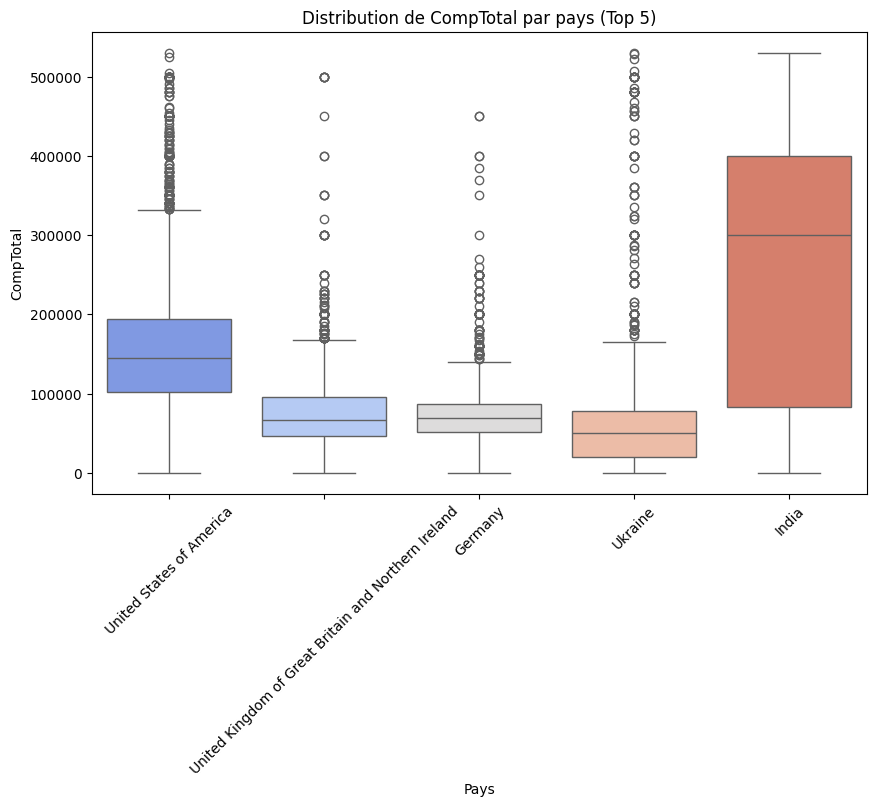

In [131]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='CompTotal', data=df_country_filtered, palette='coolwarm')

# Ajout du titre et des labels
plt.title('Distribution de CompTotal par pays (Top 5)')
plt.xlabel('Pays')
plt.xticks(fontsize=10, rotation=45)
plt.ylabel('CompTotal')
plt.show()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


In [144]:
QUERY = """SELECT Employment, CompTotal, ResponseId FROM main 
WHERE CompTotal IS NOT NULL AND CompTotal <535000 """ 
df_employ =pd.read_sql_query(QUERY,conn)

In [145]:
df_employ.shape

(27861, 3)

In [146]:
#categoriser les employment en full time, part time, student, freelancer, retired ...
# Fonction de simplification
def simplify_employment(status):
    if pd.isna(status):  # juste au cas ou mais il n'y a pas de NaN
        return 'Unknown'
    elif 'full-time' in status and 'Employed' in status:
        return 'Employed full-time'
    elif 'part-time' in status and 'Employed' in status:
        return 'Employed part-time'
    elif 'Student' in status:
        return 'Student'
    elif 'freelancer' in status or 'Independent contractor' in status or 'self-employed' in status:
        return 'Freelancer'
    elif 'Not employed' in status:
        return 'Unemployed'
    else:
        return 'Other'

# Application de la fonction
df_employ['Employment_status'] = df_employ['Employment'].apply(simplify_employment)

# Aperçu des résultats
print(df_employ[['Employment', 'Employment_status']].head())

                                          Employment   Employment_status
0                                Employed, full-time  Employed full-time
1                                Employed, full-time  Employed full-time
2  Independent contractor, freelancer, or self-em...          Freelancer
3             Employed, full-time;Student, part-time  Employed full-time
4                                Employed, full-time  Employed full-time


In [147]:
df_employ_filtered = df_employ.groupby(['Employment_status', 'CompTotal']).size().reset_index(name='Count')

In [148]:
df_employ_filtered['Employment_status'].unique()

array(['Employed full-time', 'Employed part-time', 'Freelancer', 'Other',
       'Student', 'Unemployed'], dtype=object)

/tmp/ipykernel_301/4214812426.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Employment_status', y='CompTotal', data=df_employ_filtered, palette='coolwarm')


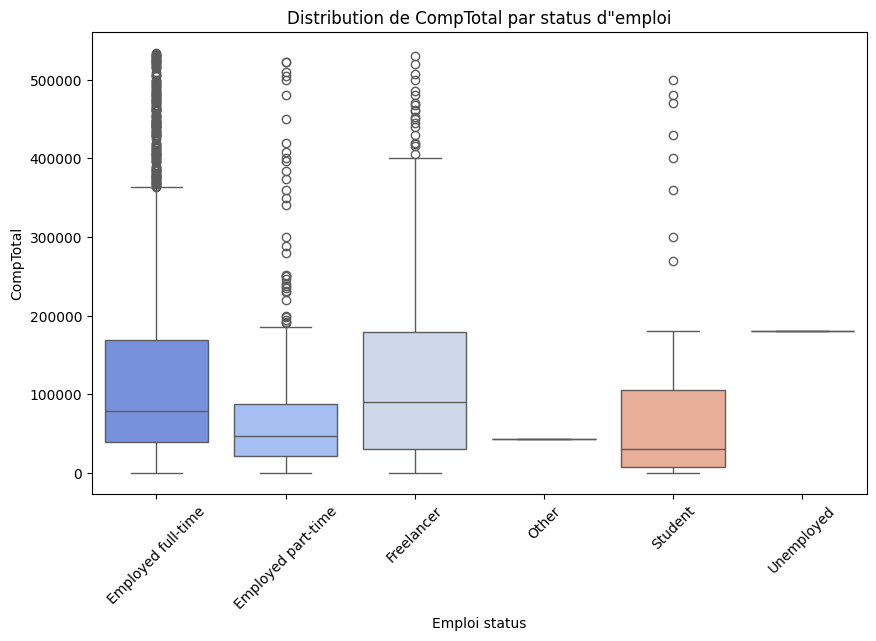

In [149]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Employment_status', y='CompTotal', data=df_employ_filtered, palette='coolwarm')

# Ajout du titre et des labels
plt.title('Distribution de CompTotal par status d"emploi')
plt.xlabel('Emploi status')
plt.xticks(fontsize=10, rotation=45)
plt.ylabel('CompTotal')
plt.show()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


In [158]:
QUERY = """ SELECT YearsCodePro, JobSatPoints_6, ResponseId 
FROM main"""  
df_yearscode = pd.read_sql_query(QUERY,conn)

In [159]:
df_yearscode.shape

(65437, 3)

In [160]:
df_yearscode['YearsCodePro'].dtype

dtype('O')

In [163]:
(df_yearscode['YearsCodePro'].isnull().sum())

np.int64(13827)

In [168]:
df_yearscode = df_yearscode.dropna(subset=['YearsCodePro'])

In [169]:
(df_yearscode['YearsCodePro'].isnull().sum())

np.int64(0)

In [173]:
df_yearscode['YearsCodePro'].unique()

array(['17', '27', '7', '11', '25', '12', '10', '3', 'Less than 1 year',
       '18', '37', '15', '20', '6', '2', '16', '8', '14', '4', '45', '1',
       '24', '29', '5', '30', '26', '9', '33', '13', '35', '23', '22',
       '31', '19', '21', '28', '34', '32', '40', '50', '39', '44', '42',
       '41', '36', '38', 'More than 50 years', '43', '47', '48', '46',
       '49'], dtype=object)

In [174]:
df_yearscode['YearsCodePro']=df_yearscode['YearsCodePro'].replace('Less than 1 year', 1)


In [177]:
df_yearscode['YearsCodePro']=df_yearscode['YearsCodePro'].replace('More than 50 years', 51)

In [178]:
df_yearscode['YearsCodePro'].unique()

array(['17', '27', '7', '11', '25', '12', '10', '3', 1, '18', '37', '15',
       '20', '6', '2', '16', '8', '14', '4', '45', '1', '24', '29', '5',
       '30', '26', '9', '33', '13', '35', '23', '22', '31', '19', '21',
       '28', '34', '32', '40', '50', '39', '44', '42', '41', '36', '38',
       51, '43', '47', '48', '46', '49'], dtype=object)

In [180]:
df_yearscode['YearsCodePro']=df_yearscode['YearsCodePro'].astype('int')

In [182]:
df_yearscode['YearsCodePro'].dtype

dtype('int64')

/tmp/ipykernel_301/3304896551.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='JobSatCategory', y='YearsCodePro', data=df_yearscode, palette='coolwarm')


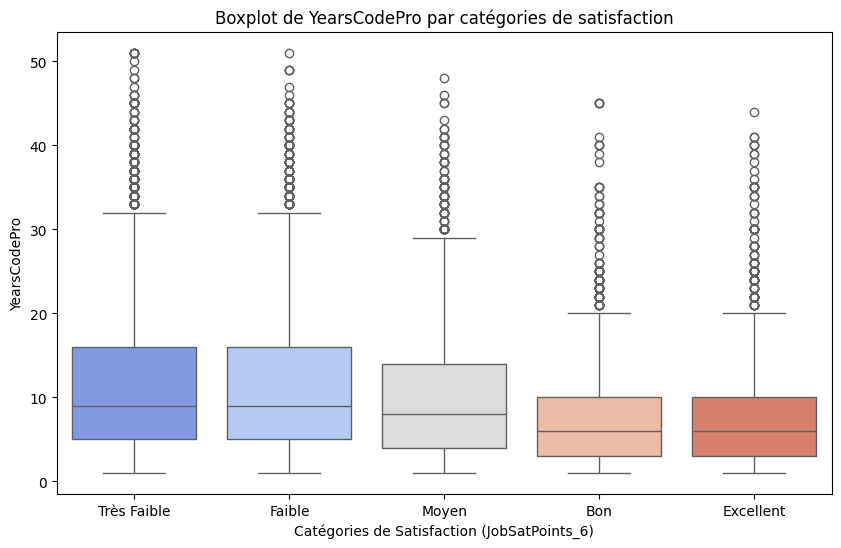

In [184]:
# Ajout d'une colonne de catégorie basée sur des intervalles
df_yearscode['JobSatCategory'] = pd.cut(df_yearscode['JobSatPoints_6'], 
                              bins=[0, 20, 40, 60, 80, 100],
                              labels=['Très Faible', 'Faible', 'Moyen', 'Bon', 'Excellent'])

# Création du boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='JobSatCategory', y='YearsCodePro', data=df_yearscode, palette='coolwarm')

# Ajustements des labels et du titre
plt.title('Boxplot de YearsCodePro par catégories de satisfaction')
plt.xlabel('Catégories de Satisfaction (JobSatPoints_6)')
plt.ylabel('YearsCodePro')
plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [ ]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
